In [3]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import datetime

# File to Load 
satellite_data = "resources/UCS-Satellite-Database-8-1-2020.csv"


# Read satellite data file and store into Pandas DataFrames
satellite_df = pd.read_csv(satellite_data)


# View Data
satellite_df

Name of Satellite, Alternate Names  \
0     1HOPSAT-TD (1st-generation High Optical Perfor...   
1                                                3Cat-1   
2                                              Aalto-1    
3                                              AAUSat-4   
4                              ABS-2 (Koreasat-8, ST-3)   
...                                                 ...   
2782                                       Ziyuan 1-02C   
2783                                        Ziyuan 1-2D   
2784                                    Ziyuan 3 (ZY-3)   
2785                                         Ziyuan 3-2   
2786                                         Ziyuan 3-3   

     Current Official Name of Satellite Country/Org of UN Registry  \
0                               1HOPSAT                  NR (3/20)   
1                                3Cat-1                         NR   
2                               Aalto-1                    Finland   
3                              AAUSat-4                    Denmark   
4                                 ABS-2                         NR   
...                                 ...                        ...   
2782                       Ziyuan 1-02C                      China   
2783                        Ziyuan 1-2D                 NR (11/19)   
2784                           Ziyuan 3                      China   
2785                         Ziyuan 3-2                      China   
2786                         Ziyuan 3-3                  NR (7/20)   

     Country of Operator/Owner  \
0                          USA   
1                        Spain   
2                      Finland   
3                      Denmark   
4                Multinational   
...                        ...   
2782                     China   
2783                     China   
2784                     China   
2785                     China   
2786                     China   

                                         Operator/Owner       Users  \
0                                          Hera Systems  Commercial   
1                  Universitat Politècnica de Catalunya       Civil   
2                                      Aalto University       Civil   
3                                 University of Aalborg       Civil   
4                         Asia Broadcast Satellite Ltd.  Commercial   
...                                                 ...         ...   
2782  China Centre for Resources Satellite Data and ...  Government   
2783  China Centre for Resources Satellite Data and ...  Government   
2784  China Centre for Resources Satellite Data and ...  Government   
2785  China Centre for Resources Satellite Data and ...  Government   
2786  China Centre for Resources Satellite Data and ...  Government   

                     Purpose                       Detailed Purpose  \
0          Earth Observation                 Technology Development   
1     Technology Development                                    NaN   
2     Technology Development                                    NaN   
3          Earth Observation  Automatic Identification System (AIS)   
4             Communications                                    NaN   
...                      ...                                    ...   
2782       Earth Observation                                    NaN   
2783       Earth Observation                                    NaN   
2784       Earth Observation                                    NaN   
2785       Earth Observation                                    NaN   
2786       Earth Observation                                    NaN   

     Class of Orbit       Type of Orbit  ...  Unnamed: 57 Unnamed: 58  \
0               LEO  Non-Polar Inclined  ...          NaN         NaN   
1               LEO                 NaN  ...          NaN         NaN   
2               LEO                 NaN  ...          NaN         NaN   
3               LEO     Sun-Synchronous  ...          NaN       

In [4]:
# Drop duplicate satellite names column. Only using current official satellite name
cleaned_data = satellite_df.drop(columns =['Name of Satellite, Alternate Names'])
cleaned_data = cleaned_data.drop(columns = ['Unnamed: 28' , 'Unnamed: 31'])


#Drop Unnamed columns
col_index = 37
for x in range(30):
    cleaned_data = cleaned_data.drop(columns = [f'Unnamed: ' + str(col_index) ])    
    col_index = col_index + 1
    

In [5]:
# Remove sources columns
cleaned_data = cleaned_data.drop(columns = ['Source'])

source_index = 1
for x in range(5):
    cleaned_data = cleaned_data.drop(columns = [f'Source.' + str(source_index) ])    
    source_index = source_index + 1

cleaned_data

Current Official Name of Satellite Country/Org of UN Registry  \
0                               1HOPSAT                  NR (3/20)   
1                                3Cat-1                         NR   
2                               Aalto-1                    Finland   
3                              AAUSat-4                    Denmark   
4                                 ABS-2                         NR   
...                                 ...                        ...   
2782                       Ziyuan 1-02C                      China   
2783                        Ziyuan 1-2D                 NR (11/19)   
2784                           Ziyuan 3                      China   
2785                         Ziyuan 3-2                      China   
2786                         Ziyuan 3-3                  NR (7/20)   

     Country of Operator/Owner  \
0                          USA   
1                        Spain   
2                      Finland   
3                      Denmark   
4                Multinational   
...                        ...   
2782                     China   
2783                     China   
2784                     China   
2785                     China   
2786                     China   

                                         Operator/Owner       Users  \
0                                          Hera Systems  Commercial   
1                  Universitat Politècnica de Catalunya       Civil   
2                                      Aalto University       Civil   
3                                 University of Aalborg       Civil   
4                         Asia Broadcast Satellite Ltd.  Commercial   
...                                                 ...         ...   
2782  China Centre for Resources Satellite Data and ...  Government   
2783  China Centre for Resources Satellite Data and ...  Government   
2784  China Centre for Resources Satellite Data and ...  Government   
2785  China Centre for Resources Satellite Data and ...  Government   
2786  China Centre for Resources Satellite Data and ...  Government   

                     Purpose                       Detailed Purpose  \
0          Earth Observation                 Technology Development   
1     Technology Development                                    NaN   
2     Technology Development                                    NaN   
3          Earth Observation  Automatic Identification System (AIS)   
4             Communications                                    NaN   
...                      ...                                    ...   
2782       Earth Observation                                    NaN   
2783       Earth Observation                                    NaN   
2784       Earth Observation                                    NaN   
2785       Earth Observation                                    NaN   
2786       Earth Observation                                    NaN   

     Class of Orbit       Type of Orbit  Longitude of GEO (degrees)  ...  \
0               LEO  Non-Polar Inclined                         0.0  ...   
1               LEO                 NaN                         0.0  ...   
2               LEO                 NaN                         0.0  ...   
3               LEO     Sun-Synchronous                         0.0  ...   
4               GEO                 NaN                        75.0  ...   
...             ...                 ...                         ...  ...   
2782            LEO     Sun-Synchronous                         0.0  ...   
2783            LEO     Sun-Synchronous                         0.0  ...   
2784            LEO     Sun-Synchronous                         0.0  ...   
2785            LEO     Sun-Synchronous                         0.0  ...   
2786            LEO     Sun-Synchronous                         0.0  ...   

     Date of Launch Expected Lifetime (yrs.)  \
0        12/11/2019                      0.5   
1        11/29/2018                     

In [6]:
#Add a column with the launch year extraceted from launch date

cleaned_data['Launch Year'] = pd.DatetimeIndex(cleaned_data['Date of Launch']).year


In [7]:
#Replace NA values in Expected Lifetime with 0 for easier analysis

cleaned_data[['Expected Lifetime (yrs.)']] = cleaned_data[['Expected Lifetime (yrs.)']].fillna(value=0)
cleaned_data['Expected Lifetime (yrs.)'] = cleaned_data['Expected Lifetime (yrs.)'].astype(float)
cleaned_data['Launch Year'] = cleaned_data['Launch Year'].astype(int)
cleaned_data[['Detailed Purpose']] = cleaned_data[['Detailed Purpose']].fillna(value='Unknown')
cleaned_data[['Type of Orbit']] = cleaned_data[['Type of Orbit']].fillna(value='Unknown')
cleaned_data[['Comments']] = cleaned_data[['Comments']].fillna(value='Unknown')


#View final cleaned dataframe
cleaned_data.head()

Current Official Name of Satellite Country/Org of UN Registry  \
0                            1HOPSAT                  NR (3/20)   
1                             3Cat-1                         NR   
2                            Aalto-1                    Finland   
3                           AAUSat-4                    Denmark   
4                              ABS-2                         NR   

  Country of Operator/Owner                        Operator/Owner       Users  \
0                       USA                          Hera Systems  Commercial   
1                     Spain  Universitat Politècnica de Catalunya       Civil   
2                   Finland                      Aalto University       Civil   
3                   Denmark                 University of Aalborg       Civil   
4             Multinational         Asia Broadcast Satellite Ltd.  Commercial   

                  Purpose                       Detailed Purpose  \
0       Earth Observation                 Technology Development   
1  Technology Development                                Unknown   
2  Technology Development                                Unknown   
3       Earth Observation  Automatic Identification System (AIS)   
4          Communications                                Unknown   

  Class of Orbit       Type of Orbit  Longitude of GEO (degrees)  ...  \
0            LEO  Non-Polar Inclined                         0.0  ...   
1            LEO             Unknown                         0.0  ...   
2            LEO             Unknown                         0.0  ...   
3            LEO     Sun-Synchronous                         0.0  ...   
4            GEO             Unknown                        75.0  ...   

  Expected Lifetime (yrs.)                            Contractor  \
0                      0.5                          Hera Systems   
1                      0.0  Universitat Politècnica de Catalunya   
2                      2.0                      Aalto University   
3                      0.0                 University of Aalborg   
4                     15.0                   Space Systems/Loral   

   Country of Contractor                 Launch Site Launch Vehicle  \
0                    USA  Satish Dhawan Space Centre           PSLV   
1                  Spain  Satish Dhawan Space Centre           PSLV   
2                Finland  Satish Dhawan Space Centre           PSLV   
3                Denmark         Guiana Space Center     Soyuz 2.1a   
4                    USA         Guiana Space Center   Ariane 5 ECA   

  COSPAR Number NORAD Number  \
0     2019-089H        44859   
1     2018-096K        43728   
2     2017-036L        42775   
3     2016-025E        41460   
4     2014-006A        39508   

                                            Comments  \
0  Pathfinder for planned earth observation const...   
1                                     Student built.   
2              Technology development and education.   
3                                Carries AIS system.   
4  32 C-band, 51 Ku-band, and 6 Ka-band transpond...   

  Source Used for Orbital Data  Launch Year  
0                JMSatcat/3_20         2019  
1                    Estimated         2018  
2               JMSatcat/10_17         2017  
3                      Space50         2016  
4                        ZARYA         2014  

[5 rows x 29 columns]

In [8]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"

cleaned_data.to_csv("resources/cleaned_data.csv", encoding="utf-8", index=False)

In [9]:
#Use this cell to load data for plotting and analysis

# File to Load 
cleaned_satellite_data = "resources/cleaned_data.csv"


# Read satellite data file and store into Pandas DataFrames
cleaned_satellite_df = pd.read_csv(cleaned_satellite_data)


# View Data
# Note columns in middle not displayed due to size limitation on pandas display. 

cleaned_satellite_df


Current Official Name of Satellite Country/Org of UN Registry  \
0                               1HOPSAT                  NR (3/20)   
1                                3Cat-1                         NR   
2                               Aalto-1                    Finland   
3                              AAUSat-4                    Denmark   
4                                 ABS-2                         NR   
...                                 ...                        ...   
2782                       Ziyuan 1-02C                      China   
2783                        Ziyuan 1-2D                 NR (11/19)   
2784                           Ziyuan 3                      China   
2785                         Ziyuan 3-2                      China   
2786                         Ziyuan 3-3                  NR (7/20)   

     Country of Operator/Owner  \
0                          USA   
1                        Spain   
2                      Finland   
3                      Denmark   
4                Multinational   
...                        ...   
2782                     China   
2783                     China   
2784                     China   
2785                     China   
2786                     China   

                                         Operator/Owner       Users  \
0                                          Hera Systems  Commercial   
1                  Universitat Politècnica de Catalunya       Civil   
2                                      Aalto University       Civil   
3                                 University of Aalborg       Civil   
4                         Asia Broadcast Satellite Ltd.  Commercial   
...                                                 ...         ...   
2782  China Centre for Resources Satellite Data and ...  Government   
2783  China Centre for Resources Satellite Data and ...  Government   
2784  China Centre for Resources Satellite Data and ...  Government   
2785  China Centre for Resources Satellite Data and ...  Government   
2786  China Centre for Resources Satellite Data and ...  Government   

                     Purpose                       Detailed Purpose  \
0          Earth Observation                 Technology Development   
1     Technology Development                                Unknown   
2     Technology Development                                Unknown   
3          Earth Observation  Automatic Identification System (AIS)   
4             Communications                                Unknown   
...                      ...                                    ...   
2782       Earth Observation                                Unknown   
2783       Earth Observation                                Unknown   
2784       Earth Observation                                Unknown   
2785       Earth Observation                                Unknown   
2786       Earth Observation                                Unknown   

     Class of Orbit       Type of Orbit  Longitude of GEO (degrees)  ...  \
0               LEO  Non-Polar Inclined                         0.0  ...   
1               LEO             Unknown                         0.0  ...   
2               LEO             Unknown                         0.0  ...   
3               LEO     Sun-Synchronous                         0.0  ...   
4               GEO             Unknown                        75.0  ...   
...             ...                 ...                         ...  ...   
2782            LEO     Sun-Synchronous                         0.0  ...   
2783            LEO     Sun-Synchronous                         0.0  ...   
2784            LEO     Sun-Synchronous                         0.0  ...   
2785            LEO     Sun-Synchronous                         0.0  ...   
2786            LEO     Sun-Synchronous                         0.0  ...   

     Expected Lifetime (yrs.)                                Contractor  \
0                         0.5                              He

In [10]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [11]:
#How many satellites does a given country have in orbit, and what are they used for?
orbit_countries = cleaned_satellite_df['Country of Operator/Owner'].value_counts()
orbit_countries

USA                                  1406
China                                 375
Russia                                170
United Kingdom                        129
Japan                                  80
Multinational                          64
India                                  58
ESA                                    53
Canada                                 39
Germany                                33
Luxembourg                             32
Spain                                  21
South Korea                            17
Argentina                              16
Israel                                 16
Saudi Arabia                           13
Australia                              13
Netherlands                            12
France                                 12
Italy                                  12
Taiwan/USA                             11
Brazil                                 11
Indonesia                               9
United Arab Emirates              

In [12]:
country_purpose = cleaned_satellite_df[['Country of Operator/Owner', 'Purpose']] 
country_purpose


Country of Operator/Owner  \
0                                   USA   
1                                 Spain   
2                               Finland   
3                               Denmark   
4                         Multinational   
5                         Multinational   
6                         Multinational   
7                         Multinational   
8                         Multinational   
9                         Multinational   
10                                  USA   
11                                  USA   
12                                  USA   
13                                  USA   
14                                  USA   
15                                  USA   
16                                  USA   
17                                  USA   
18                                  USA   
19                                  USA   
20                                  USA   
21                                  USA   
22                                  ESA   
23                                  USA   
24                                  USA   
25                                  USA   
26                                  USA   
27                                  USA   
28                                  USA   
29                                  USA   
30                                  USA   
31                                  USA   
32                                  USA   
33                                  USA   
34                                  USA   
35                                  USA   
36                                  USA   
37                                  USA   
38                                  USA   
39                                  USA   
40                                  USA   
41                                  USA   
42                        Multinational   
43                                  USA   
44                              Germany   
45                               Norway   
46                               Norway   
47                               Russia   
48                               Russia   
49                               Russia   
50                                Spain   
51                                Spain   
52                 United Arab Emirates   
53                              Algeria   
54                                Japan   
55                           Kazakhstan   
56                                  USA   
57                              Algeria   
58                              Algeria   
59                              Algeria   
60                              Algeria   
61                                Spain   
62                                Spain   
63                                Spain   
64                                Spain   
65                                  USA   
66                                  USA   
67                                  USA   
68                                  USA   
69                                  USA   
70                                  USA   
71                                  USA   
72                                  USA   
73                                  USA   
74                                  USA   
75                               Russia   
76                               Israel   
77                               Israel   
78                               Israel   
79                                  USA   
80                          South Korea   
81                                  USA   
82                                  ESA   
83                               Canada   
84                               Canada   
85                               Canada   
86                               Canada   
87                               Canada   
88                                Japan   
89                            Argentina   
90                        USA/Argentina   
91                            Argentina   
92             

In [13]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>


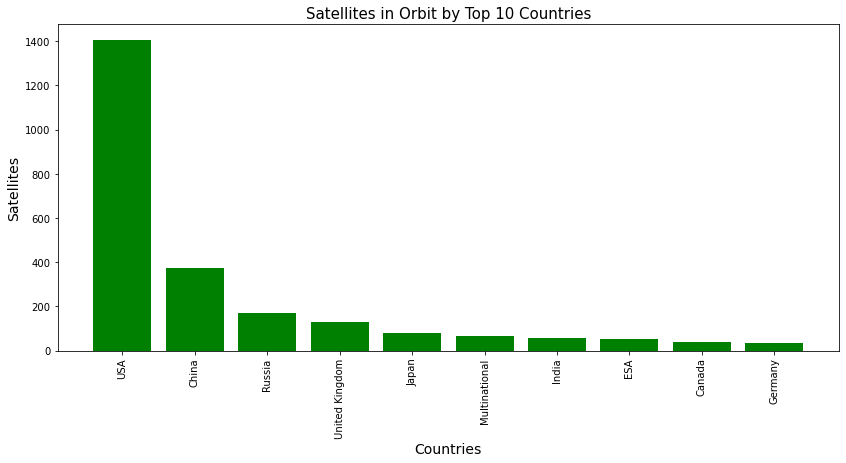

<Figure size 1080x288 with 0 Axes>

In [25]:
#satellites by top 10 countries for bar chart 

countries = ["USA", "China", "Russia","United Kingdom", "Japan", "Multinational", "India", "ESA", "Canada", "Germany"]
satellites = [1406, 375, 170, 129, 80, 64, 58, 53, 39, 33]
x_axis = np.arange(len(satellites))
y_axis = np.arange(len(countries))

fig, ax = plt.subplots(figsize=(14,6))
plt.bar(x_axis, satellites, color="g", align="center")


tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, countries, size= 10, rotation=90)

plt.title("Satellites in Orbit by Top 10 Countries", fontsize=15)
plt.xlabel("Countries", fontsize=14)
plt.ylabel("Satellites", fontsize=14)
plt.figure(figsize = (15, 4))
plt.savefig("Images/OrbitalSatellites.png", bbox_inches="tight")

plt.show()

In [15]:
#extracted satellites used solely for military
military_use_defined = cleaned_satellite_df[(cleaned_satellite_df['Users'] == 'Military')]
military_use_defined


Current Official Name of Satellite Country/Org of UN Registry  \
10                              USA 139                        USA   
11                              USA 171                        USA   
12                              USA 202                        USA   
13                              USA 223                        USA   
14                              USA 237                        USA   
15                              USA 268                        USA   
16                              USA 235                        USA   
17                              USA 246                         NR   
18                              USA 288                        USA   
19                              USA 292                        USA   
20                              USA 298                  NR (4/20)   
29                         Aerocube 14A                  NR (3/20)   
30                         Aerocube 14B                  NR (3/20)   
31                         Aerocube 15A                  NR (3/20)   
56                                ALiCE                         NR   
80                            ANASIS-II                  NR (7/20)   
154                         Cosmos 2503                     Russia   
155                         Cosmos 2515                     Russia   
252                         CartoSat 2A                      India   
262                             USA 283                        USA   
267                            CELTEE-1                        USA   
278                             Chefsat                  NR (3/20)   
279                           Chafsat-2                  NR (3/20)   
299                             USA 257                        USA   
303                          COMSATBw-1                    Germany   
304                          COMSATBw-2                    Germany   
305                           Condor E2                         NR   
306                            Coriolis                        USA   
322                         Cosmos 2504                     Russia   
323                         Cosmos 2519                     Russia   
324                         Cosmos 2535                     Russia   
325                         Cosmos 2536                     Russia   
326                         Cosmos 2542                     Russia   
327                         Cosmos 2543                     Russia   
328                         Cosmos 2537                     Russia   
329                          Cosmos2538                     Russia   
339                               CSO-1                     France   
363                                DHFR                         NR   
383                             USA 131                        USA   
384                             USA 147                        USA   
385                             USA 172                        USA   
386                             USA 173                        USA   
387                             USA 210                        USA   
523                             USA 167                        USA   
524                             USA 170                        USA   
525                             USA 135                        USA   
526                             USA 148                        USA   
527                             USA 153                        USA   
528                             USA 113                        USA   
529                             USA 130                        USA   
530                             USA 149                        USA   
531                             USA 159                        USA   
532                             USA 176                        USA   
534                                 DSX                 NR (11/19)   
558                         Cosmos 2510                     Russia   
559                         Cosmos 2518                     Russia   
560            

In [16]:
#count how many satellites are used  for military 
military_use = military_use_defined['Users'].value_counts()
military_use

Military    357
Name: Users, dtype: int64

In [17]:
#extracted satellites used solely for commercial
commercial_use_defined = cleaned_satellite_df[(cleaned_satellite_df['Users'] == 'Commercial')]
commercial_use_defined

Current Official Name of Satellite Country/Org of UN Registry  \
0                               1HOPSAT                  NR (3/20)   
4                                 ABS-2                         NR   
5                                ABS-2A                         NR   
6                                ABS-3A                         NR   
7                                 ABS-4                         NR   
8                                 ABS-6                         NR   
9                                 ABS-7                South Korea   
23                         Aerocube 10A                        USA   
24                         Aerocube 10B                        USA   
25                         Aerocube 11A                         NR   
26                         Aerocube 11B                         NR   
27                         Aerocube 12A                         NR   
28                         Aerocube 12B                         NR   
32                          Aerocube 5C                         NR   
33                          Aerocube 6A                         NR   
34                          Aerocube 6B                         NR   
35                          Aerocube 7A                         NR   
36                          Aerocube 7B                  NR (3/20)   
37                          Aerocube 7C                  NR (3/20)   
38                          Aerocube 8A                         NR   
39                          Aerocube 8B                         NR   
40                          Aerocube 8C                         NR   
41                          Aerocube 8D                         NR   
42                         Eutelsat 48D                     France   
50                         AISTechSat-2                         NR   
51                         AISTechSat-3                  NR (4/20)   
52                             Al Yah-3                     Brazil   
54                                ALE-2                  NR (3/20)   
61                           Amazonas-2                     Brazil   
62                           Amazonas-3                     Brazil   
63                          Amazonas-4A                         NR   
64                           Amazonas-5                         NR   
65                                AMC-1                        USA   
66                               AMC-11                        USA   
67                               AMC-15                        USA   
68                               AMC-16                        USA   
69                               AMC-18                        USA   
70                                AMC-2                        USA   
71                               AMC-21             United Kingdom   
72                                AMC-4                        USA   
73                                AMC-6                        USA   
74                                AMC-8                        USA   
83                              Anik F1                     Canada   
84                             Anik F1R                     Canada   
85                              Anik F2                     Canada   
86                              Anik F3                     Canada   
87                              Anik G1                         NR   
89                          AprizeSat 1                        USA   
90                         AprizeSat 10                         NR   
91                          AprizeSat 2                        USA   
92                          AprizeSat 3                        USA   
93                          AprizeSat 4                        USA   
94                          AprizeSat 5                        USA   
95                          AprizeSat 7                        USA   
96                          AprizeSat 8                         NR   
97                          AprizeSat 9                         NR   
98             

In [18]:
#count how many satellites are used  for military 
commercial_use = commercial_use_defined['Users'].value_counts()
commercial_use

Commercial    1514
Name: Users, dtype: int64

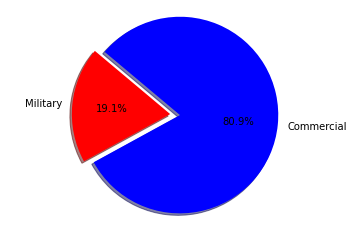

In [19]:
use = ["Military", "Commercial"]
uses = [357, 1514]
colors = ["red","blue"]
explode = (0.1,0)
             
plt.pie(uses, explode=explode, labels=use, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig("Purpose.png")
plt.show()


In [20]:
#countries with a purpose for earth observation 
earth_observation = cleaned_satellite_df[(cleaned_satellite_df['Purpose'] == 'Earth Observation')]
earth_observation.head(10)
 

Current Official Name of Satellite Country/Org of UN Registry  \
0                             1HOPSAT                  NR (3/20)   
3                            AAUSat-4                    Denmark   
10                            USA 139                        USA   
11                            USA 171                        USA   
12                            USA 202                        USA   
13                            USA 223                        USA   
14                            USA 237                        USA   
15                            USA 268                        USA   
22                             Aeolus                        ESA   
43                                AIM                        USA   

   Country of Operator/Owner  \
0                        USA   
3                    Denmark   
10                       USA   
11                       USA   
12                       USA   
13                       USA   
14                       USA   
15                       USA   
22                       ESA   
43                       USA   

                                       Operator/Owner       Users  \
0                                        Hera Systems  Commercial   
3                               University of Aalborg       Civil   
10               National Reconnaissance Office (NRO)    Military   
11               National Reconnaissance Office (NRO)    Military   
12               National Reconnaissance Office (NRO)    Military   
13               National Reconnaissance Office (NRO)    Military   
14               National Reconnaissance Office (NRO)    Military   
15               National Reconnaissance Office (NRO)    Military   
22                        European Space Agency (ESA)  Government   
43  Center for Atmospheric Sciences, Hampton Unive...  Government   

              Purpose                       Detailed Purpose Class of Orbit  \
0   Earth Observation                 Technology Development            LEO   
3   Earth Observation  Automatic Identification System (AIS)            LEO   
10  Earth Observation                Electronic Intelligence            GEO   
11  Earth Observation                Electronic Intelligence            GEO   
12  Earth Observation                Electronic Intelligence            GEO   
13  Earth Observation                Electronic Intelligence            GEO   
14  Earth Observation                Electronic Intelligence            GEO   
15  Earth Observation                Electronic Intelligence            GEO   
22  Earth Observation                          Earth Science            LEO   
43  Earth Observation                          Earth Science            LEO   

         Type of Orbit  Longitude of GEO (degrees) Perigee (km) Apogee (km)  \
0   Non-Polar Inclined                         0.0          566         576   
3      Sun-Synchronous                         0.0          442         687   
10             Unknown                       -26.0       35,560      36,013   
11             Unknown                        95.4       35,589      35,984   
12             Unknown                        44.0       35,714      35,937   
13             Unknown                       100.9       35,500      35,500   
14             Unknown                        60.0       35,771      35,805   
15             Unknown                       102.6       35,613      35,903   
22             Unknown                         0.0          314         317   
43     Sun-Synchronous                         0.0          544         552   

    Eccentricity  Inclination (degrees) Period (minutes) Launch Mass (kg.)  \
0       0.000720                  36.90            96.08                22   
3       0.017700                  98.20             95.9                 1   
10      0.005370                   7.72          1436.14             4,500   
11      0.004680                   3.20           1436.1             4,500   
12      0.0

In [21]:
#countries with earth observing satellites
earth_observation_countries = earth_observation[['Country of Operator/Owner', 'Purpose']]
earth_observation_countries

Country of Operator/Owner            Purpose
0                                   USA  Earth Observation
3                               Denmark  Earth Observation
10                                  USA  Earth Observation
11                                  USA  Earth Observation
12                                  USA  Earth Observation
13                                  USA  Earth Observation
14                                  USA  Earth Observation
15                                  USA  Earth Observation
22                                  ESA  Earth Observation
43                                  USA  Earth Observation
50                                Spain  Earth Observation
51                                Spain  Earth Observation
57                              Algeria  Earth Observation
58                              Algeria  Earth Observation
60                              Algeria  Earth Observation
117                               Japan  Earth Observation
118                               Japan  Earth Observation
154                              Russia  Earth Observation
155                              Russia  Earth Observation
156                               China  Earth Observation
210                               China  Earth Observation
212                              Bhutan  Earth Observation
214                             Germany  Earth Observation
216                             Belarus  Earth Observation
217                                 USA  Earth Observation
218                                 USA  Earth Observation
219                                 USA  Earth Observation
220                                 USA  Earth Observation
221                                 USA  Earth Observation
234                              France  Earth Observation
240                               China  Earth Observation
241                               China  Earth Observation
249                                 USA  Earth Observation
250                               India  Earth Observation
251                               India  Earth Observation
252                               India  Earth Observation
253                               India  Earth Observation
254                               India  Earth Observation
255                               India  Earth Observation
256                               India  Earth Observation
257                               India  Earth Observation
258                               India  Earth Observation
263                        China/Brazil  Earth Observation
274                        China/France  Earth Observation
283                               China  Earth Observation
284                               China  Earth Observation
285                               China  Earth Observation
290                                 USA  Earth Observation
291                                 USA  Earth Observation
292                                 USA  Earth Observation
293                                 USA  Earth Observation
294                                 USA  Earth Observation
295                                 USA  Earth Observation
300                                 USA  Earth Observation
305                        South Africa  Earth Observation
306                                 USA  Earth Observation
307                                 USA  Earth Observation
308                                 USA  Earth Observation
309                                 USA  Earth Observation
310                                 USA  Earth Observation
311                          Taiwan/USA  Earth Observation
312                          Taiwan/USA  Earth Observation
313                          Taiwan/USA  Earth Observation
314                          Taiwan/USA  Earth Observation
315                          Taiwan/USA  Earth Observation
316                          Taiwan/USA  Earth Observation
317                          Taiwan/USA  Earth Observation
31

In [22]:
#grouped by country
grouped_earth_observing = earth_observation_countries['Country of Operator/Owner'].value_counts()
grouped_earth_observing

USA                                  352
China                                177
Japan                                 33
Russia                                29
India                                 23
ESA                                   14
Taiwan/USA                            11
Israel                                 9
Germany                                8
Argentina                              8
Italy                                  8
Multinational                          7
France                                 7
United Kingdom                         6
South Korea                            5
Spain                                  5
Canada                                 5
Finland                                4
Saudi Arabia                           4
Kazakhstan                             3
Algeria                                3
Turkey                                 3
Singapore                              3
Vietnam                                2
Brazil          

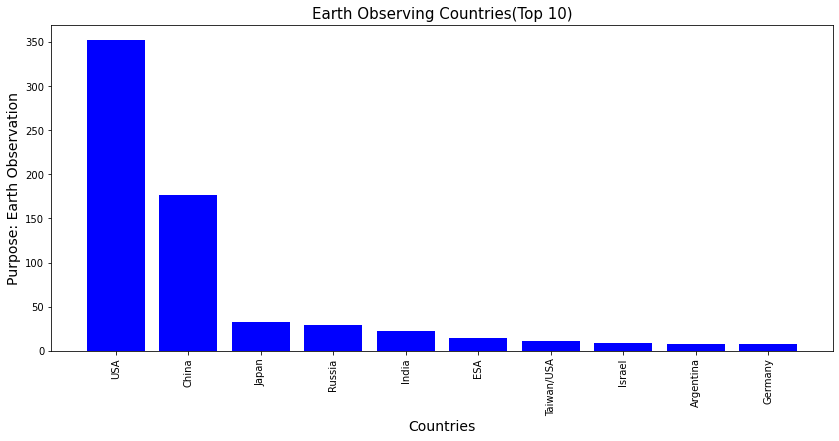

In [26]:
countries = ["USA", "China", "Japan","Russia","India", "ESA", "Taiwan/USA", "Israel", "Argentina", "Germany"]
earth_observing = [352, 177, 33, 29, 23, 14, 11, 9, 8, 8]
x_axis = np.arange(len(earth_observing))
y_axis = np.arange(len(countries))

fig, ax = plt.subplots(figsize=(14,6))
plt.bar(x_axis, earth_observing, color="b", align="center")


tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, countries, size= 10, rotation=90)

plt.title("Earth Observing Countries(Top 10)", fontsize=15)
plt.xlabel("Countries", fontsize=14)
plt.ylabel("Purpose: Earth Observation", fontsize=14)
plt.savefig("Images/EarthObserving.png", bbox_inches="tight")


plt.show()  